In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [199]:
import sys
sys.path.append("C:/git/dynamic_pricing/")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [244]:
from src.simulations import SimpleSimulation
from src.simple_bandit import SimpleBandit
from src.binomial_bandit import BinomialBandit

In [378]:
simulation = SimpleSimulation(mu = 60, sigma=10)
simulation.optimal_price

47.683319091796875

In [379]:
def plot_demand(simulation, min_price = 0, max_price = 100, n_points = 50, n_estimates_per_point = 40) : 
    prices = []
    revenues = []
    for price in np.linspace(min_price, max_price, n_points) : 
        revenues.extend( [int(simulation.evaluate(price)) * price for x in range(n_estimates_per_point)] )
        prices.extend([price for x in range(n_estimates_per_point)])
    
    a = np.array([prices, revenues])

    fig = plt.figure(figsize = (15,6), facecolor="w")
    ax = sns.lineplot(a[0], a[1])
    ax.legend("")

47.683319091796875


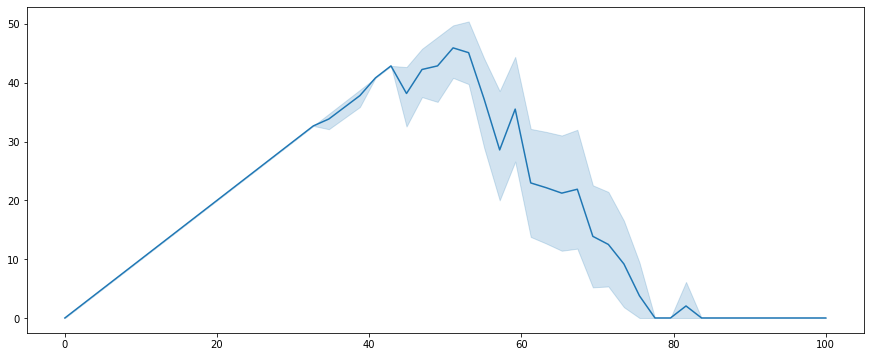

In [385]:
print(simulation.optimal_price)
plot_demand(simulation)

In [395]:
size = 30

k_p = np.linspace(20,80,size)
alpha_0 = np.repeat(6,size)
beta_0 = np.repeat(6,size)

bandit = BinomialBandit(k_p, alpha_0, beta_0)

BinomialBandit model instanciated with 30 arms.


In [396]:
hist = []
# Exploration round
for i in range(size * 40):
    for j in range(bandit.k):
        bandit.chose_action(force_action=j)
        price = k_p[bandit.action]
        reward = int(simulation.evaluate(price)) * price
        bandit.update(bandit.action, reward)

for i in range(1000):
    bandit.chose_action(method="thompson")
    price = k_p[bandit.action]
    reward = int(simulation.evaluate(price)) * price
    bandit.update(bandit.action, reward)
    hist.append(bandit.action)

In [397]:
occ = sorted(Counter(hist).items(), key = lambda k : k[1])
for index, nb_occ in occ : 
    print(f"Bucket {index} -- Nb occ {nb_occ} -- Price {bandit.k_p[index]}")

Bucket 16 -- Nb occ 2 -- Price 53.10344827586207
Bucket 15 -- Nb occ 5 -- Price 51.03448275862069
Bucket 12 -- Nb occ 17 -- Price 44.827586206896555
Bucket 13 -- Nb occ 189 -- Price 46.896551724137936
Bucket 14 -- Nb occ 787 -- Price 48.96551724137932


___________

In [349]:
from scipy.stats import norm, invgamma, beta, bernoulli

In [350]:
def plot_distrib_beta(alpha_param, beta_param, ax, n_points = 100, label = None):
    x = np.linspace(0, 1, n_points)
    y = beta.pdf(x, alpha_param, beta_param)
    ax.plot(x,y, label=label)
    return ax

def sample_theta(bandit):
    # Sample sigma
    theta = beta.rvs(bandit.alpha_n, bandit.beta_n)
    return theta

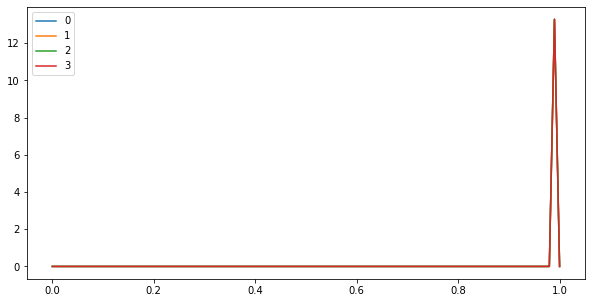

In [398]:
fig = plt.figure(figsize=(10,5), facecolor="w")
ax = plt.subplot()
min_bucket = 0
max_bucket = 4
i = min_bucket
for _alpha, _beta in zip(bandit.alpha_n[min_bucket:max_bucket], bandit.beta_n[min_bucket:max_bucket]):
    plot_distrib_beta(_alpha,_beta, ax, label=i)
    i+=1
    ax.legend()

In [52]:
def plot_distrib_normal(mean, std, ax, x_min = 0, x_max = 100, n_points = 100):
    x = np.linspace(x_min, x_max)
    y = norm.pdf(x, mean, std)
    ax.plot(x,y)
    return ax

def sample(bandit):
    # Sample sigma
    sigma = bandit.b_n * invgamma.rvs(bandit.a_n)
    # Sample mu
    mu = np.random.normal(bandit.alpha_n, sigma * bandit.beta_0)
    return mu,sigma

In [72]:
#------------ Multiple sampling on mu & sigma ---------#
# Init
mu, sigma = sample(bandit)
mu , sigma = pd.DataFrame(mu), pd.DataFrame(sigma)
# Loop 
for i in range(bandit.k):
    mu_, sigma_ = sample(bandit)
    mu[i] = mu_
    sigma[i] = sigma_

In [80]:
bucket = 0

m = mu.iloc[:,bucket].values
s = sigma.iloc[:,bucket].values

In [85]:
m.mean()

3014103.0339192892

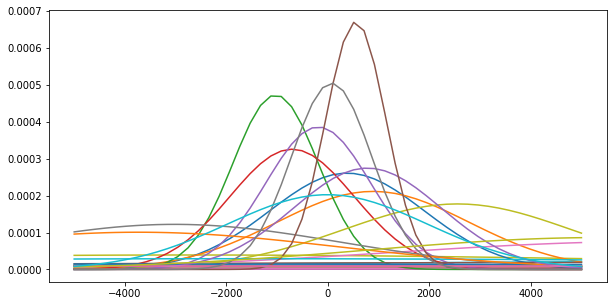

In [83]:
fig = plt.figure(figsize=(10,5), facecolor="w")
ax = plt.subplot()
for _mu, _sigma in zip(m,s):
    plot_distrib_normal(_mu,_sigma, ax, x_min=-5000, x_max=5000, n_points=200)

In [25]:
_mu

881952000.6243838

In [ ]:
ax = plot_distrib(1,7, fig)

In [ ]:
x = np.linspace(-5,100,100)
y = norm.pdf(x, 40,10)
plt.plot(x,y)

In [ ]:
def plot_distrib()

In [ ]:
# Init
mu, sigma = sample(bandit)
mu , sigma = pd.DataFrame(mu), pd.DataFrame(sigma)
# Loop 
for i in range(1,30):
    mu_, sigma_ = sample(bandit)
    mu[i] = mu_
    sigma[i] = sigma_

In [ ]:
import seaborn as sns

In [ ]:
sns.lineplot(mu)

In [ ]:
mu = pd.DataFrame()

In [ ]:
mu["2"] = mu

In [ ]:
mu

In [ ]:
np.insert(mu, -1, mu)